In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:100% !important; }</style>"))

In [2]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])

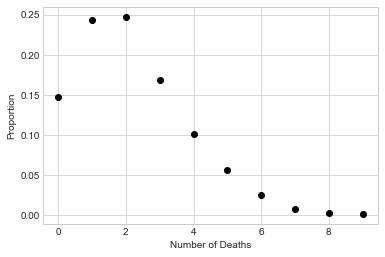

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

In [4]:
lam= (freq*np.arange(1,11)).sum()/freq.sum()

In [5]:
lam

3.156934306569343

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

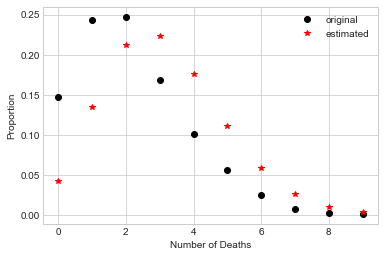

In [7]:
from scipy.special import factorial

t = np.arange(0,10)
d = np.exp(-lam)*np.power(lam, t)/factorial(t)

plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black', label= 'original')
plt.plot(t, d, '*', label='estimated', color='red')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion")
plt.legend()
plt.show()

In [8]:
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
def likelihood(x):
    return -(np.sum(freq*np.log(x[0]*np.exp(-x[1])*np.power(x[1],t)/factorial(t) + (1-x[0])*np.exp(-x[2])*np.power(x[2],t)/factorial(t))))

In [10]:
likelihood([0.35,1.2561,2.6634])

1989.9902145695303

In [11]:
from scipy import optimize

In [12]:
initial= [0.5,1,2.5]

In [13]:
fit= optimize.minimize(likelihood,x0=initial, method='SLSQP', tol=0.00001)

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [14]:
fit

     fun: 1989.9458623783908
     jac: array([-0.00637817,  0.01138306, -0.00311279])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([0.36023958, 1.25683523, 2.66377831])

In [15]:
alpha=[]
mu1=[]
mu2=[]
for i in range(1000):
    initial= [0.3,1,2.5]
    fit= optimize.minimize(likelihood,x0=initial, method='SLSQP', tol=0.00001)
    alpha.append(fit.x[0])
    mu1.append(fit.x[1])
    mu2.append(fit.x[2])

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [16]:
print("alpha confidence interval : " )
print((np.percentile(np.array(alpha), 2.5),np.percentile(np.array(alpha), 97.5)))

alpha confidence interval : 
(0.3598589398750457, 0.3598589398750457)


In [17]:
print("mu1 confidence interval : " )
print((np.percentile(np.array(mu1), 2.5),np.percentile(np.array(mu1), 97.5)))

mu1 confidence interval : 
(1.256047596168394, 1.256047596168394)


In [18]:
print("mu2 confidence interval : " )
print((np.percentile(np.array(mu2), 2.5),np.percentile(np.array(mu2), 97.5)))

mu2 confidence interval : 
(2.663376620190098, 2.663376620190098)


In [19]:
def likelihood(alpha):
    return -(np.sum(freq*np.log(alpha*np.exp(-1.256)*np.power(1.256,t)/factorial(t) + (1-alpha)*np.exp(-2.66)*np.power(2.66,t)/factorial(t))))

In [20]:
likelihood(0.35)

1989.9795000317215

In [21]:
# Building the model
alpha = 0.3

L = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent


# Performing Gradient Descent 
for i in range(epochs): 
    D_alpha =  np.sum(freq*(((np.exp(-1.2561)*np.power(1.256,t)/factorial(t)) - (np.exp(-2.6633)*np.power(2.6633,t)/factorial(t))) /((alpha*np.exp(-1.2561)*np.power(1.2561,t)/factorial(t)) + ((1-alpha)*np.exp(-2.6633)*np.power(2.6633,t)/factorial(t))))) # Derivative wrt alpha
    alpha = alpha + L * D_alpha  # Update alpha
    
print (alpha)

0.35972677188124086


In [22]:
def likelihood(mu1):
    return -(np.sum(freq*np.log(0.359*np.exp(-mu1)*np.power(mu1,t)/factorial(t) + (1-0.359)*np.exp(-2.66)*np.power(2.66,t)/factorial(t))))

In [23]:
likelihood(1.25)

1989.9482313796823

In [24]:
# Building the model
mu1 = 1

L = 0.005  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent


# Performing Gradient Descent 
for i in range(epochs): 
    D_mu1 =  np.sum(freq*((0.359*np.power(float(mu1),t-1)*(np.exp(-mu1))*(t-mu1)/factorial(t)) /((0.359*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-0.359)*np.exp(-2.6633)*np.power(2.6633,t)/factorial(t))))) # Derivative wrt alpha
    mu1 = mu1 + L * D_mu1  # Update mu1

print (mu1)

1.254042038154977


In [25]:
def likelihood(mu2):
    return -(np.sum(freq*np.log(0.359*np.exp(-1.254)*np.power(1.254,t)/factorial(t) + (1-0.359)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))

In [26]:
likelihood(2.66)

1989.9464931352509

In [27]:
# Building the model
mu2 = 3

L = 0.0001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent


# Performing Gradient Descent 
for i in range(epochs): 
    D_mu2 =  np.sum(freq*(((1-0.359)*np.power(float(mu2),t-1)*(np.exp(-mu2))*(t-mu2)/factorial(t)) /((0.359*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-0.359)*np.exp(-2.6633)*np.power(2.6633,t)/factorial(t))))) # Derivative wrt alpha
    mu2 = mu2 + L * D_mu2  # Update mu1

print (mu2)

2.649834861240643


# Updating all simultaneously

In [28]:
def likelihood(alpha,mu1,mu2):
    return -(np.sum(freq*np.log(alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t) + (1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))

In [29]:
likelihood(0.35,1.25,2.66)

1989.9670864296702

In [30]:
# Building the model
alpha = 0.3
mu1   = 1
mu2   = 3

alpha_list=[]
mu1_list=[]
mu2_list=[]
likelihood_list=[]
L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent


# Performing Gradient Descent 
for i in np.arange(1,epochs): 
    
    D_alpha =  np.sum(freq*(((np.exp(-mu1)*np.power(mu1,t)/factorial(t)) - (np.exp(-mu2)*np.power(mu2,t)/factorial(t))) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt alpha
    
    D_mu1 =  np.sum(freq*((alpha*np.power(float(mu1),t-1)*(np.exp(-mu1))*(t-mu1)/factorial(t)) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt mu1
 
    D_mu2 =  np.sum(freq*(((1-alpha)*np.power(float(mu2),t-1)*(np.exp(-mu2))*(t-mu2)/factorial(t)) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt alpha
    
    alpha = alpha + L * D_alpha   # Update alpha
    mu1 = mu1 + L * D_mu1         # Update mu1
    mu2 = mu2 + L * D_mu2         # Update mu2
    likelihood= np.sum(freq*np.log(alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t) + (1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t)))
    
    
    alpha_list.append(alpha)
    mu1_list.append(mu1)
    mu2_list.append(mu2)
    likelihood_list.append(likelihood)
    
    if i>3:
        if (likelihood_list[i-1] - likelihood_list[i-2]< 0.000001):                        # if likelihood doesn't converge more, this will break out of the loop
            print("loop stopped for low converging rate at epoch={}".format(i))
            break;
        
print (alpha,mu1,mu2)

loop stopped for low converging rate at epoch=81
0.35742002052442273 1.2515603200332464 2.6604624826159147


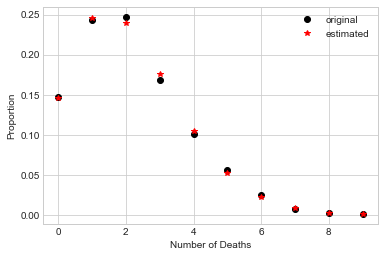

In [40]:
from scipy.special import factorial

t = np.arange(0,10)
d = 0.35*np.exp(-1.25)*np.power(1.25, t)/factorial(t) + (1-0.35)*np.exp(-2.66)*np.power(2.66, t)/factorial(t)    # mixture of the two poisson variables

plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black', label= 'original')
plt.plot(t, d, '*', label='estimated', color='red')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion")
plt.legend()
plt.show()

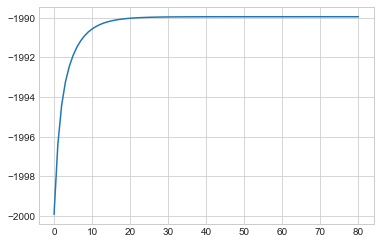

In [31]:
plt.plot(likelihood_list)

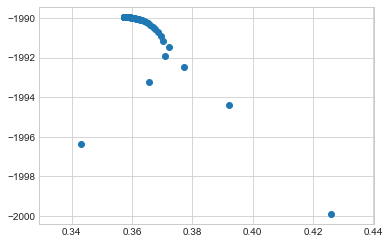

In [32]:
plt.scatter(alpha_list, likelihood_list)

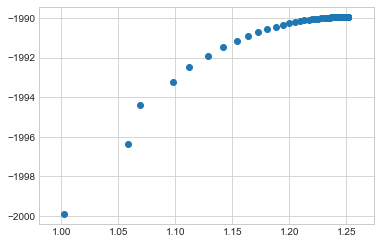

In [33]:
plt.scatter(mu1_list, likelihood_list)

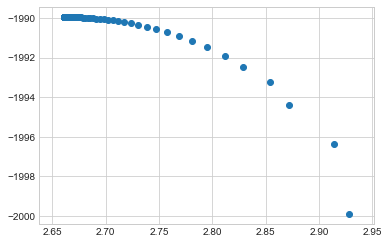

In [35]:
plt.scatter(mu2_list, likelihood_list)

# EM algorithm

In [41]:
z = (alpha*np.exp(-mu1)*np.power(mu1,t))/(alpha*np.exp(-mu1)*np.power(mu1,t)+ (1-alpha)*np.exp(-mu2)*np.power(mu2,t))

In [43]:
alpha = np.sum(freq*z)/np.sum(freq)

In [45]:
mu1 = np.sum(freq*t*z)/np.sum(freq*z)

In [47]:
mu2= np.sum(freq*t*(1-z))/np.sum(freq*(1-z))

In [50]:
alpha, mu1,mu2 = 0.3, 1,3

for i in range(1000):
    # E step
    z = (alpha*np.exp(-mu1)*np.power(mu1,t))/(alpha*np.exp(-mu1)*np.power(mu1,t)+ (1-alpha)*np.exp(-mu2)*np.power(mu2,t))
    
    # M step
    alpha= np.sum(freq*z)/np.sum(freq)
    mu1 = np.sum(freq*t*z)/np.sum(freq*z)
    mu2= np.sum(freq*t*(1-z))/np.sum(freq*(1-z))
    
print(alpha,mu1, mu2)

0.3592667543620744 1.2550188670447502 2.6626490246255856
